# Nettoyage des données

Après la construction du jeu de données complet, regroupant l’ensemble des informations nécessaires à l’analyse, nous procédons à une exploration approfondie des valeurs manquantes.

### Détection des valeurs manquantes

Dans un premier temps, analysons le nombre et le pourcentage de valeurs manquantes pour chaque variable (FIG 1) ainsi que la répartition (FIG2) et la proportion des valeurs manquantes (FIG3) selon les pays. 


--- Résumé des valeurs manquantes ---
                         Nombre de valeurs manquantes  \
gini_index                                        203   
poverty_headcount                                 203   
tb_incidence_per_100k                             114   
doctors_per_10k                                   112   
maternal_mortality_rate                           112   
health_exp_usd                                     45   
health_exp_gdp                                     45   
population_total                                   25   
infant_mortality_rate                              25   
dtp3_vaccination_rate                              25   
urban_population                                   25   
gdp_per_capita                                     25   
pop_density                                        25   
Country                                             0   
Year                                                0   
hospital_beds_per_10k                            

/var/folders/v7/pbgny3cd5w93s0mx56kgv3s80000gn/T/ipykernel_46710/288942644.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_missing = df.groupby('Country').apply(lambda x: x.isnull().sum().sum() / (x.shape[0] * x.shape[1]) * 100)
/var/folders/v7/pbgny3cd5w93s0mx56kgv3s80000gn/T/ipykernel_46710/288942644.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_missing.index, y=country_missing.values, palette='Reds_r')


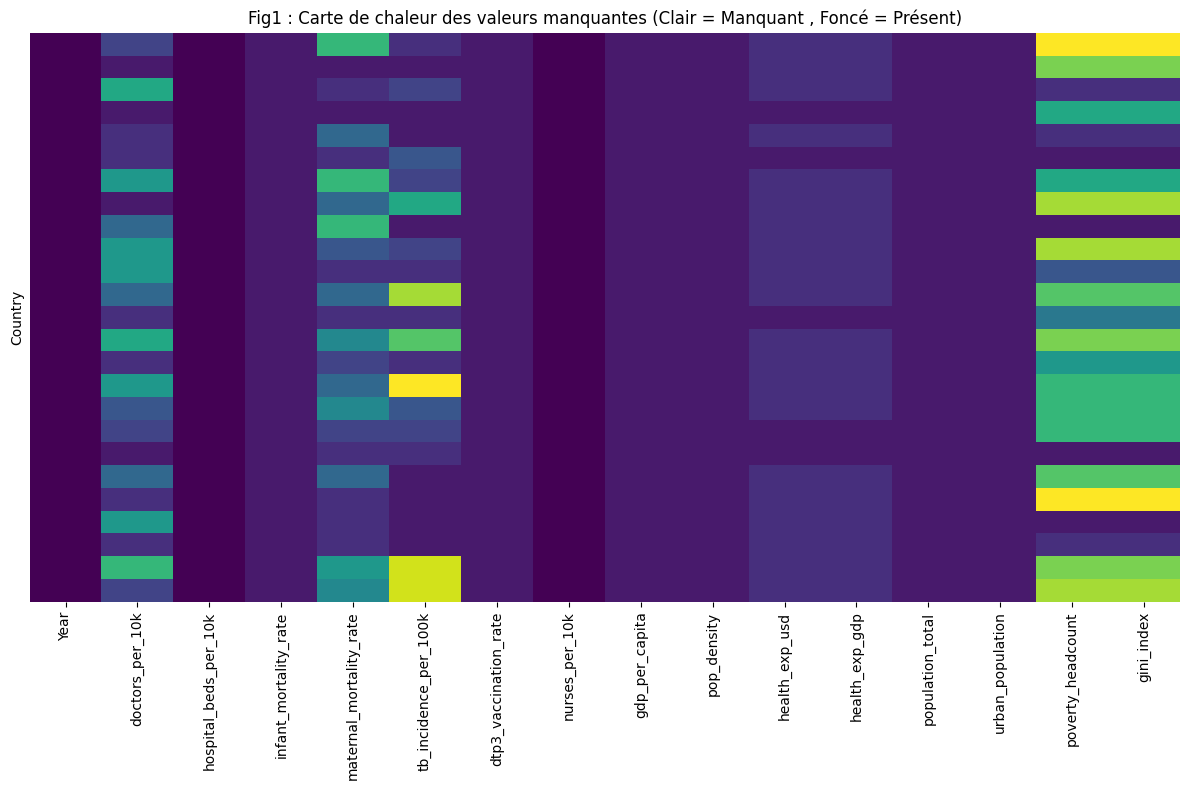

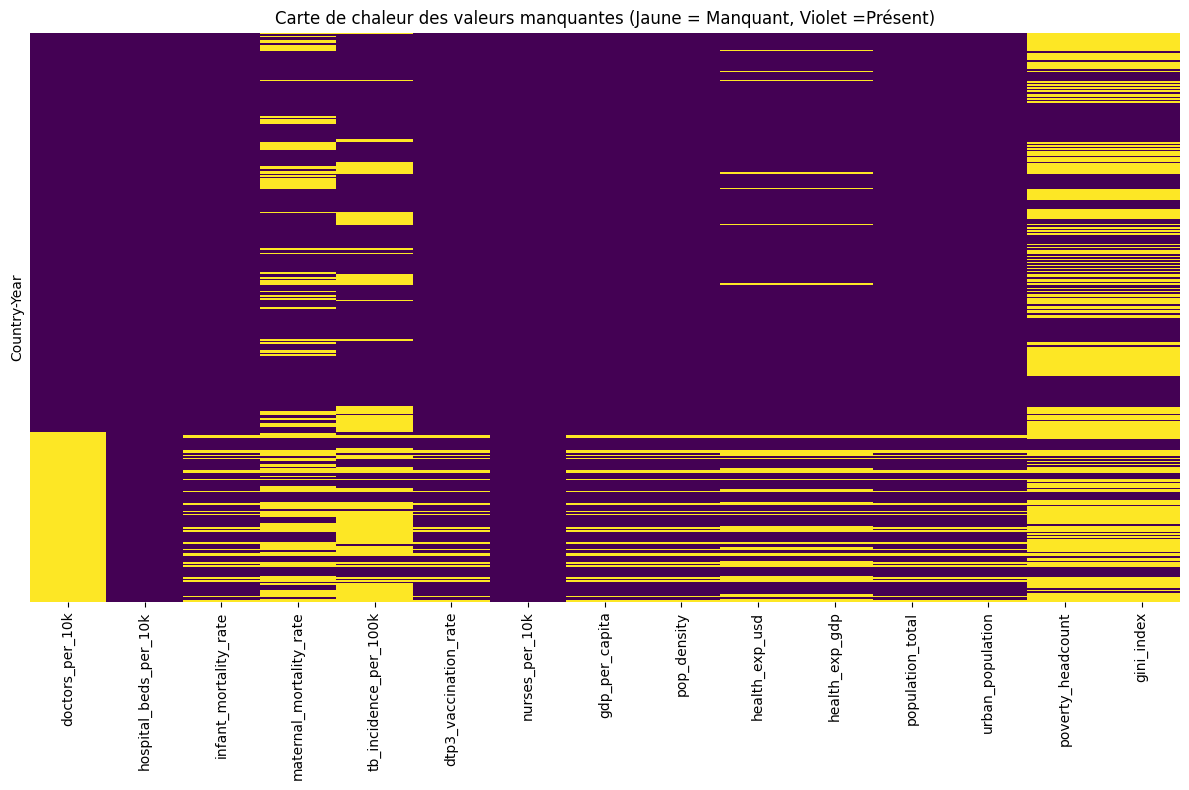

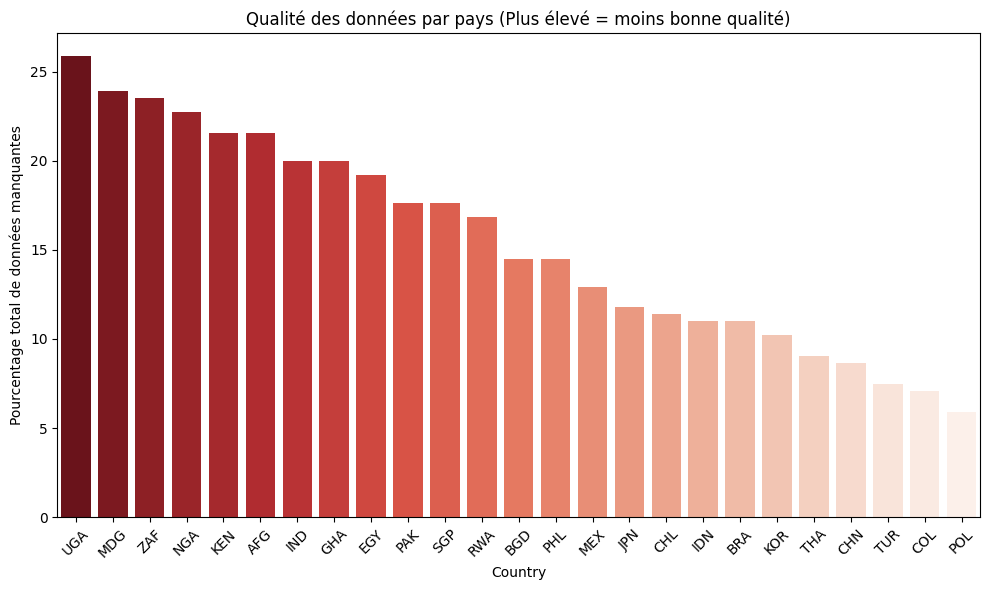

In [1]:
""" Ce code permet de visualiser les valeurs manquantes selon les pays et les variables d’intérêt"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_missing_values(file_path):
    df = pd.read_csv(file_path)
    
    # 1. Vérification des valeurs manquantes : nombre et pourcentage de valeurs manquantes pour chaque variable
    print("\n--- Résumé des valeurs manquantes ---")
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    
    summary = pd.DataFrame({
        'Nombre de valeurs manquantes': missing_counts,
        'Pourcentage de valeurs manquantes': missing_percent
    })
    print(summary.sort_values('Pourcentage de valeurs manquantes', ascending=False))
    
    # 2. Visualisation : cartes de chaleur des valeurs manquantes
    #Les visualisations permettent d’identifier des motifs structurels dans les données manquantes : données absentes pour certains pays, certaines variables ou certaines périodes.
    
    #Fig 1 : valeurs manquantes par pays et par variable :
    #pour repérer les variables systématiquement mal renseignées ainsi que les pays présentant des manques importants de données

    plt.figure(figsize=(12,8))
    plt.title("Fig1 : Carte de chaleur des valeurs manquantes (Clair = Manquant , Foncé = Présent)")
    df1 = df.set_index('Country')
    country_missing2 = df1.groupby('Country').apply(lambda x: x.isnull().sum() / x.shape[0]*x.shape[1] *100)
    sns.heatmap(country_missing2,  cbar=False, yticklabels=False, cmap='viridis')
    plt.tight_layout()
    plt.savefig('Fig1_missing_values_per_col_per_country.png')

    #Fig 2 : valeurs manquantes par couple (pays, année)
    """ Si le schéma est différent de celui de la Fig 1, cela signifie qu'il nous manque certaines années.  
    Résultat : Le schéma est identique. Puisque les systèmes de santé sont organisés à l'échelle nationale,
    un pays peut rencontrer des difficultés à collecter des données pour une année donnée, 
    mais cela reste indépendant de la capacité des autres pays à collecter leurs propres données."""
    
    plt.figure(figsize=(12, 8))    
    # Nous définissons Country et Year comme index afin de ne pas vérifier les valeurs nulles pour ces colonnes
    # mais uniquement pour les indicateurs. 
    df_heat = df.set_index(['Country', 'Year']).isnull()

    # cbar=False cleans it up
    sns.heatmap(df_heat, cbar=False, yticklabels=False, cmap='viridis')
    plt.title("Carte de chaleur des valeurs manquantes (Jaune = Manquant, Violet =Présent)")
    plt.tight_layout()
    plt.savefig('Fig2_missing_values_heatmap.png')

    
    # Fig3 :  Proportion totale de valeurs manquantes par pays
    """ Cette dernière figure vise à évaluer la qualité globale des données par pays.
    Un seuil arbitraire de 20 % de valeurs manquantes est retenu :
    au-delà de ce seuil, le pays est considéré comme insuffisamment renseigné
    pour être inclus dans l’analyse. """

    plt.figure(figsize=(10, 6))
    # Calcul du pourcentage de valeurs manquantes par pays
    """ Pour chaque pays :
1. Créer un mini-DataFrame correspondant.
2. Compter le nombre total de valeurs manquantes dans ce mini-DataFrame.
 (x.isnull().sum() donne le total par colonne, ajouter .sum() pour le total global)
3. Calculer le pourcentage de valeurs manquantes en divisant par le nombre total de cellules.
    """
    country_missing = df.groupby('Country').apply(lambda x: x.isnull().sum().sum() / (x.shape[0] * x.shape[1]) * 100)
    country_missing = country_missing.sort_values(ascending=False)
    
    sns.barplot(x=country_missing.index, y=country_missing.values, palette='Reds_r')
    plt.xticks(rotation=45)
    plt.ylabel("Pourcentage total de données manquantes")
    plt.title("Qualité des données par pays (Plus élevé = moins bonne qualité)")
    plt.tight_layout()
    plt.savefig('Fig3_missing_values_by_country.png')

    print("Figures générées avec succès")


if __name__ == "__main__":

    analyze_missing_values('healthcare_data_25countries/MASTER_DATASET.csv')




Nous constatons, avec la **Figure 1**, que l’indice de Gini et le taux de pauvreté présentent un taux de valeurs manquantes trop élevé pour être exploitables de manière fiable. D'autre part, l’incidence de la tuberculose est absente pour certains pays uniquement, le nombre de médecins pour 10 000 habitants et le taux de mortalité maternelle comportent de nombreuses valeurs manquantes mais restent potentiellement utilisables.
Nous avons donc choisi d'exclure les variables ***gini_index*** et ***poverty_headcount*** de l'analyse.

Dans un second temps,la **Figure 2** examine la répartition des valeurs manquantes selon les couples (pays, année) et montre que Ces graphiques mettent les données manquantes sont majoritairement liées à des spécificités propres à certains pays, plutôt qu’à des périodes temporelles particulières.

Enfin, la **Figure 3** montre la proportion globale de valeurs manquantes pour chaque pays. Sur la base de cette analyse, un seuil de 20 % de données manquantes a été retenu afin d’exclure les pays pour lesquels la qualité de l’information disponible était insuffisante. Cette démarche permet d’améliorer la fiabilité des résultats et de limiter les biais liés à des données incomplètes dans les étapes suivantes de l’étude.

### Imputation des valeurs manquantes
 
L'objectif de cette partie est de préparer le jeu de données pour l’analyse.
Nous commençons par supprimer les colonnes inutiles ou très incomplètes. 
Ensuite, nous traitons les valeurs manquantes : pour chaque pays, nous estimons les données absentes à partir des valeurs existantes afin de conserver la cohérence temporelle, puis nous comblons les éventuelles lacunes restantes pour obtenir un jeu de données complet.
Enfin, nous vérifions qu’aucune donnée essentielle n’est manquante avant de sauvegarder le dataset prêt à être utilisé pour les analyses suivantes.

In [2]:
import pandas as pd
import numpy as np

def impute_data(input_path, output_path):
    df = pd.read_csv(input_path)
    
    # 1. Suppression des colonnes inutiles 
    # D'après notre heatmap fig1, Gini et Poverty sont majoritairement vides.
    cols_to_drop = ['gini_index', 'poverty_headcount']
    df.drop(cols_to_drop, axis=1, inplace=True)
    # axis=1 : supprime les colonnes (0 pour les lignes), inplace=True pour modifier le df original 

    
    # Trier par pays et par année 
    df.sort_values(['Country', 'Year'], inplace=True)
    
    # Obtenir la liste des colonnes numériques (on ne veut pas interpoler le nom du "Country")
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Year' in numeric_cols: 
        numeric_cols.remove('Year')
    
    def fix_country_data(group):
        """
        Cette fonction reçoit un DataFrame 'group' contenant les données d'un seul pays.
        On remplit les NaN dans ce groupe.
        """
        # si [10,na,30] => [10,20,30]
        group[numeric_cols] = group[numeric_cols].interpolate(method='linear', limit_direction='both')
        # si ça échoue parce que [10,na,na] par exemple => [10,10,10] ffill pour combler les lacunes à la fin, bfill pour combler les lacunes au début
        group[numeric_cols] = group[numeric_cols].ffill().bfill()
        return group

    # Utiliser groupby pour appliquer la fonction à chaque pays séparément
    df_clean = df.groupby('Country', group_keys=False).apply(fix_country_data)
    
    # 3. Vérification
    remaining_missing = df_clean.isnull().sum().sum()
    print(f"Valeurs manquantes restantes après imputation: {remaining_missing}")
    
    if remaining_missing > 0:
        print("!!!!! Certains pays pourraient ne pas avoir de données du tout pour certaines colonnes.")
        drop_rows = df_clean[df_clean.isnull().any(axis=1)] # récupérer les lignes avec des valeurs nulles restantes
        print(drop_rows[['Country','Year']].groupby('Country').count())
        df_clean.dropna(inplace=True)
        # dans ce cas, supprimer les lignes

    
    # Sauvegarder 
    df_clean.to_csv(output_path, index=False)
    print(f"Dataset nettoyé sauvegardé")

if __name__ == "__main__":
    impute_data('healthcare_data_25countries/MASTER_DATASET.csv', 
                'healthcare_data_25countries/MASTER_DATASET_CLEAN.csv')


Valeurs manquantes restantes après imputation: 15
!!!!! Certains pays pourraient ne pas avoir de données du tout pour certaines colonnes.
         Year
Country      
NGA        15
Dataset nettoyé sauvegardé


/var/folders/v7/pbgny3cd5w93s0mx56kgv3s80000gn/T/ipykernel_46710/234811354.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df.groupby('Country', group_keys=False).apply(fix_country_data)
